In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
# load and preview data
df = pd.read_csv("eeg_clean.csv")
df.head()

,AF3,F7,eye,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4329.23,4009.23,Open,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85
1,4324.62,4004.62,Open,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10
2,4327.69,4006.67,Open,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23
3,4328.72,4011.79,Open,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41
4,4326.15,4011.79,Open,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46


In [3]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
AF3    14980 non-null float64
F7     14980 non-null float64
eye    14980 non-null object
F3     14980 non-null float64
FC5    14980 non-null float64
T7     14980 non-null float64
P7     14980 non-null float64
O1     14980 non-null float64
O2     14980 non-null float64
P8     14980 non-null float64
T8     14980 non-null float64
FC6    14980 non-null float64
F4     14980 non-null float64
F8     14980 non-null float64
AF4    14980 non-null float64
dtypes: float64(14), object(1)
memory usage: 1.7+ MB


In [4]:
# print positive/negative labels
df['eye'].value_counts()

Open      8257
Closed    6723
Name: eye, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

#labelencoder = LabelEncoder()
#df['eye'] = labelencoder.fit_transform(df['eye'])

df.loc[df['eye'] == 'Closed', 'eye'] = 0
df.loc[df['eye'] == 'Open', 'eye'] = 1

In [6]:
X = df.drop(['eye'], axis = 1)
y = df['eye']

In [7]:
X

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77


In [8]:
X.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46


In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: eye, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [11]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import lightgbm as lgb

In [12]:
model = lgb.LGBMClassifier()
lgb_params = {
    'boosting_type': ['gbdt'],
    'objective': ['binary'],
    'num_leaves': [99],
    'learning_rate': [0.1],
    'max_depth': [10],
    'lambda_l1': [0, 0.3],
    'lambda_l2':[0, 0.3],
    'feature_fraction': [0.6, 0.8], 
    'bagging_fraction': [0.6, 0.8], 
    'bagging_freq':[1],
}

In [13]:
grid_cv = GridSearchCV(model, lgb_params, cv = 3, verbose = 10)
grid_cv.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] bagging_fraction=0.6, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0, lambda_l2=0, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary 
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bagging_fraction=0.6, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0, lambda_l2=0, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary, score=0.911, total=   0.3s
[CV] bagging_fraction=0.6, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0, lambda_l2=0, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary 
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  bagging_fraction=0.6, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0, lambda_l2=0, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary, score=0.916, total=   0.3s
[CV] bagging_fraction=0.6, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0, lambda_l2=0, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary 
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  bagging_fraction=0.6, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0, lambda_l2=0, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary, score=0.912, total=   0.2s
[CV] bagging_fraction=0.6, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0, lambda_l2=0.3, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary 
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV]  bagging_fraction=0.6, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0, lambda_l2=0.3, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary, score=0.909, total=   0.2s
[CV] bagging_fraction=0.6, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0, lambda_l2=0.3, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary 
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s


[CV]  bagging_fraction=0.6, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0, lambda_l2=0.3, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary, score=0.912, total=   0.3s
[CV] bagging_fraction=0.6, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0, lambda_l2=0.3, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary 
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s remaining:    0.0s


[CV]  bagging_fraction=0.6, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0, lambda_l2=0.3, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary, score=0.918, total=   0.3s
[CV] bagging_fraction=0.6, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.3, lambda_l2=0, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary 
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=0.3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.5s remaining:    0.0s


[CV]  bagging_fraction=0.6, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.3, lambda_l2=0, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary, score=0.918, total=   0.3s
[CV] bagging_fraction=0.6, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.3, lambda_l2=0, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary 
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=0.3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.8s remaining:    0.0s


[CV]  bagging_fraction=0.6, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.3, lambda_l2=0, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary, score=0.912, total=   0.3s
[CV] bagging_fraction=0.6, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.3, lambda_l2=0, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary 
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=0.3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.1s remaining:    0.0s


[CV]  bagging_fraction=0.6, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.3, lambda_l2=0, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary, score=0.912, total=   0.3s
[CV] bagging_fraction=0.6, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.3, lambda_l2=0.3, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary 
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=0.3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.3s remaining:    0.0s


[CV]  bagging_fraction=0.6, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.3, lambda_l2=0.3, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary, score=0.913, total=   0.3s
[CV] bagging_fraction=0.6, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.3, lambda_l2=0.3, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary 
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=0.3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[CV]  bagging_fraction=0.6, bagging_freq=1, boosting_t

[CV]  bagging_fraction=0.6, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.8, lambda_l1=0.3, lambda_l2=0, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary, score=0.920, total=   0.3s
[CV] bagging_fraction=0.6, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.8, lambda_l1=0.3, lambda_l2=0, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary 
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[CV]  bagging_fraction=0.6, bagging_freq=1, boosting_type=gbdt

[CV]  bagging_fraction=0.8, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0, lambda_l2=0.3, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary, score=0.915, total=   0.3s
[CV] bagging_fraction=0.8, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0, lambda_l2=0.3, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary 
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0.3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[CV]  bagging_fraction=0.8, bagging_freq=1, boosting_type=gbdt

[CV]  bagging_fraction=0.8, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.8, lambda_l1=0, lambda_l2=0, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary, score=0.920, total=   0.3s
[CV] bagging_fraction=0.8, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.8, lambda_l1=0, lambda_l2=0, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary 
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[CV]  bagging_fraction=0.8, bagging_freq=1, boosting_type=gbdt, featur

[CV]  bagging_fraction=0.8, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.8, lambda_l1=0.3, lambda_l2=0.3, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary, score=0.924, total=   0.4s
[CV] bagging_fraction=0.8, bagging_freq=1, boosting_type=gbdt, feature_fraction=0.8, lambda_l1=0.3, lambda_l2=0.3, learning_rate=0.1, max_depth=10, num_leaves=99, objective=binary 
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0.3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[CV]  bagging_fraction=0.8, bagging_freq=1, boosting_t

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   15.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=Tru...
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'bagging_fraction': [0.6, 0.8], 'bagging_freq': [1],
                         'boosting_type': ['gbdt'],
                         'feature_fraction

In [14]:
print(grid_cv.best_params_)

{'bagging_fraction': 0.8, 'bagging_freq': 1, 'boosting_type': 'gbdt', 'feature_fraction': 0.8, 'lambda_l1': 0.3, 'lambda_l2': 0.3, 'learning_rate': 0.1, 'max_depth': 10, 'num_leaves': 99, 'objective': 'binary'}


In [15]:
# define categorical variables
# build the lightgbm model
import lightgbm as lgb
best_params = grid_cv.best_params_
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test)
bst = lgb.train(best_params, lgb_train, 1000, valid_sets=lgb_test, early_stopping_rounds=20)

[LightGBM] [Info] Number of positive: 5836, number of negative: 4650
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3490
[LightGBM] [Info] Number of data points in the train set: 10486, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.556552 -> initscore=0.227178
[LightGBM] [Info] Start training from score 0.227178
[1]	valid_0's binary_logloss: 0.651055
Training until validation scores don't improve for 20 rounds
[2]	valid_0's binary_logloss: 0.616885
[3]	valid_0's binary_logloss: 0.587336
[4]	valid_0's binary_logloss: 0.564844
[5]	valid_0's binary_logloss: 0.541094
[6]	valid_0's binary_logloss: 0.521095
[7]	valid_0's binary_logloss: 0.505611
[8]	valid_0's binary_logloss: 0.4904
[9]	valid_0's binary_logloss: 0.474501
[10]	valid_0's binary_logloss: 0.459541
[11]	valid_0's binary_logloss: 0.44782
[12]	valid_0's bin

[123]	valid_0's binary_logloss: 0.173455
[124]	valid_0's binary_logloss: 0.172829
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[125]	valid_0's binary_logloss: 0.172422
[126]	valid_0's binary_logloss: 0.171837
[127]	valid_0's binary_logloss: 0.171128
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[128]	valid_0's binary_logloss: 0.170612
[129]	valid_0's binary_logloss: 0.170391
[130]	valid_0's binary_logloss: 0.170015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[131]	valid_0's binary_logloss: 0.16935
[132]	valid_0's binary_logloss: 0.168509
[133]	valid_0's binary_logloss: 0.167609
[134]	valid_0's binary_logloss: 0.166974
[135]	valid_0's binary_logloss: 0.166234
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[136]	valid_0's binary_logloss: 0.166095
[137]	valid_0's binary_logloss: 0.16514
[138]	valid_0's binary_logloss: 0.164551
[139]	valid_0's binary_logloss: 0.16403
[140]	

[285]	valid_0's binary_logloss: 0.130735
[286]	valid_0's binary_logloss: 0.130834
[287]	valid_0's binary_logloss: 0.130654
[288]	valid_0's binary_logloss: 0.130559
[289]	valid_0's binary_logloss: 0.130312
[290]	valid_0's binary_logloss: 0.130304
[291]	valid_0's binary_logloss: 0.130334
[292]	valid_0's binary_logloss: 0.130306
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[293]	valid_0's binary_logloss: 0.130248
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[294]	valid_0's binary_logloss: 0.13023
[295]	valid_0's binary_logloss: 0.130255
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[296]	valid_0's binary_logloss: 0.130173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[297]	valid_0's binary_logloss: 0.130072
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[298]	valid_0's binary_logloss: 0.130014
[LightGBM] [Warning] No further splits with positive

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[386]	valid_0's binary_logloss: 0.126187
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[387]	valid_0's binary_logloss: 0.126042
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[388]	valid_0's binary_logloss: 0.126015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[389]	valid_0's binary_logloss: 0.125947
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[390]	valid_0's binary_logloss: 0.125985
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[391]	valid_0's binary_logloss: 0.125943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[392]	valid_0's binary_logloss: 0.1259
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[393]	valid_0's binary_logloss: 0.125892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

<Figure size 864x432 with 0 Axes>

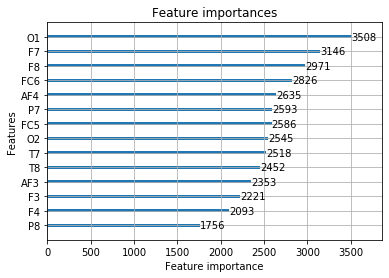

In [16]:
plt.figure(figsize=(12,6))
lgb.plot_importance(bst, max_num_features=30)
plt.title("Feature importances")
plt.show()

In [99]:
y_pred = bst.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

y_pred_train = bst.predict(X_train)
y_pred_train = np.where(y_pred_train > 0.5, 1, 0)

In [100]:
# view accuracy
from sklearn.metrics import accuracy_score
# print the scores on training and test set
print('Training set score: {:.4f}'.format(accuracy_score(y_train, y_pred_train)))
print('Test set score: {:.4f}'.format(accuracy_score(y_test, y_pred)))

Training set score: 1.0000
Test set score: 0.9544


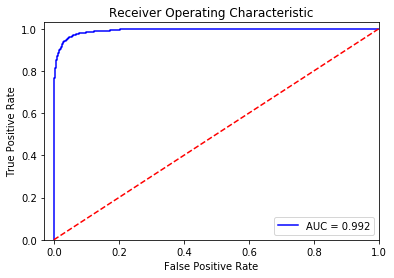

In [101]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = bst.predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.03, 1])
plt.ylim([0, 1.03])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()